Instalacja wymaganych pakietów

In [99]:
! pip install pyspark==3.0.1 py4j==0.10.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Tworzenie Spark session

In [100]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()
# gdzie "*" znaczy wszystkie rdzenie procesora.

Podłączenie dysku google

In [101]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Classroom  'Colab Notebooks'   IHME_HEALTH_SPENDING_1995_2018_Y2021M09D22.CSV


Czytanie danych z pliku

In [102]:
# Czytanie z pliku csv
csv_file = "/content/drive/My Drive/IHME_HEALTH_SPENDING_1995_2018_Y2021M09D22.CSV"
df = spark.read.csv(csv_file)

Strukturyzacja danych za pomocą schematu Spark

In [109]:
data = spark.read.csv(
      "/content/drive/My Drive/IHME_HEALTH_SPENDING_1995_2018_Y2021M09D22.CSV",
      sep=',',
      header=True,
      )
data.printSchema()

root
 |-- location_id: string (nullable = true)
 |-- location_name: string (nullable = true)
 |-- iso3: string (nullable = true)
 |-- level: string (nullable = true)
 |-- year: string (nullable = true)
 |-- the_total_mean: string (nullable = true)
 |-- the_total_lower: string (nullable = true)
 |-- the_total_upper: string (nullable = true)
 |-- the_total_ppp_mean: string (nullable = true)
 |-- the_total_ppp_lower: string (nullable = true)
 |-- the_total_ppp_upper: string (nullable = true)
 |-- ghes_total_mean: string (nullable = true)
 |-- ghes_total_lower: string (nullable = true)
 |-- ghes_total_upper: string (nullable = true)
 |-- ghes_total_ppp_mean: string (nullable = true)
 |-- ghes_total_ppp_lower: string (nullable = true)
 |-- ghes_total_ppp_upper: string (nullable = true)
 |-- ppp_total_mean: string (nullable = true)
 |-- ppp_total_lower: string (nullable = true)
 |-- ppp_total_upper: string (nullable = true)
 |-- ppp_total_ppp_mean: string (nullable = true)
 |-- ppp_total_ppp

Manualna strukturyzacja danych

In [104]:
from pyspark.sql.types import *

data_schema = [
    StructField('location_id', IntegerType(), True), #czy dopuszczalna jest wartość null
    StructField('location_name', StringType(), True),
    StructField('year', IntegerType(), True),
    StructField('the_total_mean', DoubleType(), True),
]

final_struc = StructType(fields = data_schema)
data = spark.read.csv(
      '/content/drive/My Drive/IHME_HEALTH_SPENDING_1995_2018_Y2021M09D22.CSV',
      sep=',',
      header=True,
      schema=final_struc
)

data.printSchema()

root
 |-- location_id: integer (nullable = true)
 |-- location_name: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- the_total_mean: double (nullable = true)



Kontrola danych

In [105]:
data.schema

StructType(List(StructField(location_id,IntegerType,true),StructField(location_name,StringType,true),StructField(year,IntegerType,true),StructField(the_total_mean,DoubleType,true)))

In [106]:
data.dtypes

[('location_id', 'int'),
 ('location_name', 'string'),
 ('year', 'int'),
 ('the_total_mean', 'double')]

In [107]:
data.head

<bound method DataFrame.head of DataFrame[location_id: int, location_name: string, year: int, the_total_mean: double]>

Manipulacja kolumnami

In [110]:
data = data.withColumn('iso3_new', data.iso3) #kopia
data.show(5)

+-----------+-------------+----+-------+----+--------------+---------------+---------------+------------------+-------------------+-------------------+---------------+----------------+----------------+-------------------+--------------------+--------------------+--------------+---------------+---------------+------------------+-------------------+-------------------+--------------+---------------+---------------+------------------+-------------------+-------------------+--------------+------------------+----------------+-----------------+-----------------+--------------------+---------------------+---------------------+-----------------+------------------+------------------+---------------------+----------------------+----------------------+----------------+-----------------+-----------------+--------------------+---------------------+---------------------+----------------+-----------------+-----------------+--------------------+---------------------+---------------------+-------------

In [111]:
data = data.withColumnRenamed('iso3_new', 'iso3_new_mark2') #zmiana nazwy
data.show(5)

+-----------+-------------+----+-------+----+--------------+---------------+---------------+------------------+-------------------+-------------------+---------------+----------------+----------------+-------------------+--------------------+--------------------+--------------+---------------+---------------+------------------+-------------------+-------------------+--------------+---------------+---------------+------------------+-------------------+-------------------+--------------+------------------+----------------+-----------------+-----------------+--------------------+---------------------+---------------------+-----------------+------------------+------------------+---------------------+----------------------+----------------------+----------------+-----------------+-----------------+--------------------+---------------------+---------------------+----------------+-----------------+-----------------+--------------------+---------------------+---------------------+-------------

In [112]:
data = data.drop('iso3_new_mark2') #kasacja
data.show(5)

+-----------+-------------+----+-------+----+--------------+---------------+---------------+------------------+-------------------+-------------------+---------------+----------------+----------------+-------------------+--------------------+--------------------+--------------+---------------+---------------+------------------+-------------------+-------------------+--------------+---------------+---------------+------------------+-------------------+-------------------+--------------+------------------+----------------+-----------------+-----------------+--------------------+---------------------+---------------------+-----------------+------------------+------------------+---------------------+----------------------+----------------------+----------------+-----------------+-----------------+--------------------+---------------------+---------------------+----------------+-----------------+-----------------+--------------------+---------------------+---------------------+-------------

Obróbka brakujących wartości

In [113]:
from pyspark.sql import functions as f
#usuwanie wierszy z brakującymi wartościami
data.na.drop()
#zastąpienie brakującej wartości za pomocą średniej
data.na.fill(data.select(f.mean(data['ghes_per_cap_upper'])).collect()[0][0])
#zastąpienie brakujących wartości nowymi
#data.na.replace(old_value, new_vallue)

DataFrame[location_id: string, location_name: string, iso3: string, level: string, year: string, the_total_mean: string, the_total_lower: string, the_total_upper: string, the_total_ppp_mean: string, the_total_ppp_lower: string, the_total_ppp_upper: string, ghes_total_mean: string, ghes_total_lower: string, ghes_total_upper: string, ghes_total_ppp_mean: string, ghes_total_ppp_lower: string, ghes_total_ppp_upper: string, ppp_total_mean: string, ppp_total_lower: string, ppp_total_upper: string, ppp_total_ppp_mean: string, ppp_total_ppp_lower: string, ppp_total_ppp_upper: string, oop_total_mean: string, oop_total_lower: string, oop_total_upper: string, oop_total_ppp_mean: string, oop_total_ppp_lower: string, oop_total_ppp_upper: string, dah_total_mean: string, dah_total_ppp_mean: string, the_per_cap_mean: string, the_per_cap_lower: string, the_per_cap_upper: string, the_per_cap_ppp_mean: string, the_per_cap_ppp_lower: string, the_per_cap_ppp_upper: string, ghes_per_cap_mean: string, ghes_p

Pobieranie danych

Select

In [114]:
data.select(['location_name', 'year', 'the_total_mean']).show(5)

+-------------+----+--------------+
|location_name|year|the_total_mean|
+-------------+----+--------------+
|  Afghanistan|1995|        528409|
|  Afghanistan|1996|        516915|
|  Afghanistan|1997|        509874|
|  Afghanistan|1998|        485561|
|  Afghanistan|1999|        463720|
+-------------+----+--------------+
only showing top 5 rows



Filter

In [115]:
#filtrowanie na podstawie warunku & | ~(not)
from pyspark.sql.functions import col
data.filter((col('year') >= 2000) & (col('year') <= 2003)).show(5)

+-----------+-------------+----+-------+----+--------------+---------------+---------------+------------------+-------------------+-------------------+---------------+----------------+----------------+-------------------+--------------------+--------------------+--------------+---------------+---------------+------------------+-------------------+-------------------+--------------+---------------+---------------+------------------+-------------------+-------------------+--------------+------------------+----------------+-----------------+-----------------+--------------------+---------------------+---------------------+-----------------+------------------+------------------+---------------------+----------------------+----------------------+----------------+-----------------+-----------------+--------------------+---------------------+---------------------+----------------+-----------------+-----------------+--------------------+---------------------+---------------------+-------------

Between

In [116]:
#dane z zakresu
data.filter(data.the_total_mean.between(1000000, 9000000)).show()

+-----------+-------------+----+-------+----+--------------+---------------+---------------+------------------+-------------------+-------------------+---------------+----------------+----------------+-------------------+--------------------+--------------------+--------------+---------------+---------------+------------------+-------------------+-------------------+--------------+---------------+---------------+------------------+-------------------+-------------------+--------------+------------------+----------------+-----------------+-----------------+--------------------+---------------------+---------------------+-----------------+------------------+------------------+---------------------+----------------------+----------------------+----------------+-----------------+-----------------+--------------------+---------------------+---------------------+----------------+-----------------+-----------------+--------------------+---------------------+---------------------+-------------

When

In [117]:
data.select('location_name', 'iso3',
      f.when(data.the_total_mean >= '5000000', 1).otherwise(0)
).show(5)
#zwraca 1 gdy prawda, inaczj 0

+-------------+----+-------------------------------------------------------+
|location_name|iso3|CASE WHEN (the_total_mean >= 5000000) THEN 1 ELSE 0 END|
+-------------+----+-------------------------------------------------------+
|  Afghanistan| AFG|                                                      1|
|  Afghanistan| AFG|                                                      1|
|  Afghanistan| AFG|                                                      1|
|  Afghanistan| AFG|                                                      0|
|  Afghanistan| AFG|                                                      0|
+-------------+----+-------------------------------------------------------+
only showing top 5 rows



Like

In [118]:
data.select(
'the_total_mean',
data.the_total_mean.rlike('^[9,7]').alias('the_total_mean zaczyna sie na 9 lub 7')
).distinct().show()

+--------------+-------------------------------------+
|the_total_mean|the_total_mean zaczyna sie na 9 lub 7|
+--------------+-------------------------------------+
|         69838|                                false|
|      58163376|                                false|
|       2420975|                                false|
|       1142944|                                false|
|     162405032|                                false|
|         44340|                                false|
|         68134|                                false|
|      23070931|                                false|
|         99668|                                 true|
|         15477|                                false|
|       3587803|                                false|
|        534311|                                false|
|        883289|                                false|
|         28067|                                false|
|       4536024|                                false|
|        3

GroupBy

In [119]:
data.groupBy('ISO3').count().show()
#grupowanie, po czym wywołanie jakiejś funkcji, tutaj count (może też być mean etc)

+----+-----+
|ISO3|count|
+----+-----+
| NIU|   24|
| HTI|   24|
| PSE|   24|
| BRB|   24|
| LVA|   24|
| POL|   24|
| JAM|   24|
| ZMB|   24|
| BRA|   24|
| ARM|   24|
| MOZ|   24|
| CUB|   24|
| JOR|   24|
| FRA|   24|
| SOM|   24|
| BRN|   24|
| COD|   24|
| FSM|   24|
| BOL|   24|
| URY|   24|
+----+-----+
only showing top 20 rows



Agregacja

In [120]:
from pyspark.sql import functions as f

data.groupBy("location_name").agg(f.mean("the_total_mean").alias("total_mean_mean")).show() #średnia niezależnie od roku
#grupowanie i obliczanie wartości dla grup

+--------------------+--------------------+
|       location_name|     total_mean_mean|
+--------------------+--------------------+
|          South Asia|6.1906327458333336E7|
|                Chad|   329933.8333333333|
|Micronesia (Feder...|           21818.375|
|            Paraguay|         1295237.125|
|               Yemen|  1431750.2083333333|
|Southeast Asia, E...| 3.878079027916667E8|
|             Senegal|            631454.5|
|          Cabo Verde|   67143.70833333333|
|              Sweden|3.8863774666666664E7|
|             Tokelau|  1234.6666666666667|
|            Kiribati|  21901.166666666668|
|   Republic of Korea|       5.992538875E7|
|              Guyana|  144851.70833333334|
|             Eritrea|   89435.16666666667|
|         Philippines|   8087432.958333333|
|            Djibouti|  58924.541666666664|
|               Tonga|  20671.958333333332|
|            Malaysia|   6636143.958333333|
|           Singapore|   7900884.458333333|
|         High-income| 4.7993710

Wizualizacja danych

In [121]:
from pyspark.sql.functions import col, min, max

df = data.select('location_name', 'the_total_mean')\
      .groupBy("location_name")\
      .agg(min("the_total_mean").alias("the_total_mean_min"), 
           max("the_total_mean").alias("the_total_mean_max"))\
      .toPandas()
df.head(10)

,location_name,the_total_mean_min,the_total_mean_max
0,South Asia,103194218,96358386
1,Chad,201576,467239
2,Micronesia (Federated States of),10086,9618
3,Paraguay,1008338,967137
4,"Southeast Asia, East Asia, and Oceania",118847294,876778676
5,Yemen,1015751,921256
6,Senegal,388101,972045
7,Cabo Verde,32597,97929
8,Sweden,22629968,59684355
9,Tokelau,1060,978


In [122]:
df.dtypes

location_name         object
the_total_mean_min    object
the_total_mean_max    object
dtype: object

In [123]:
df['location_name']=df['location_name'].astype(str)
df['the_total_mean_min']=df['the_total_mean_min'].astype(float)
df['the_total_mean_max']=df['the_total_mean_max'].astype(float)
df = df.head(12)
df

,location_name,the_total_mean_min,the_total_mean_max
0,South Asia,103194218.0,96358386.0
1,Chad,201576.0,467239.0
2,Micronesia (Federated States of),10086.0,9618.0
3,Paraguay,1008338.0,967137.0
4,"Southeast Asia, East Asia, and Oceania",118847294.0,876778676.0
5,Yemen,1015751.0,921256.0
6,Senegal,388101.0,972045.0
7,Cabo Verde,32597.0,97929.0
8,Sweden,22629968.0,59684355.0
9,Tokelau,1060.0,978.0


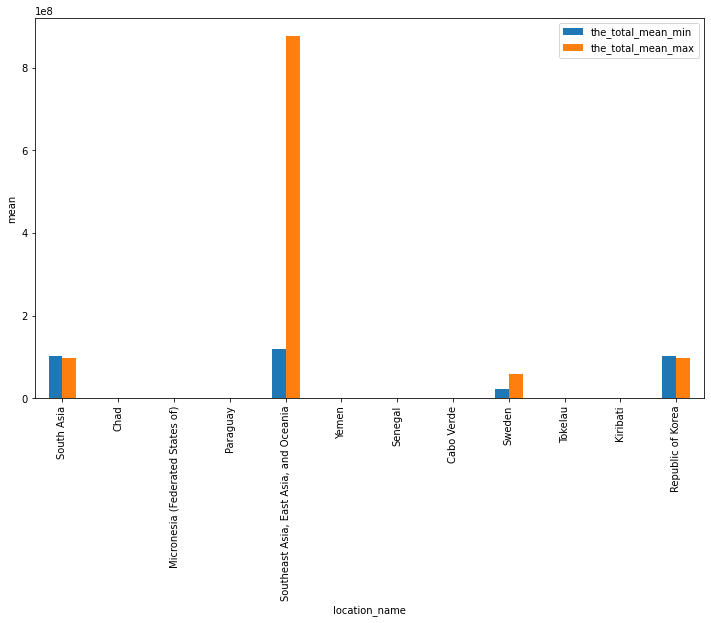

In [124]:
from matplotlib import pyplot as plt

ind = list(range(12))
df.iloc[ind ,:].plot(kind='bar', x='location_name', y=df.columns.tolist()[1:], figsize=(12, 7), ylabel='mean', xlabel='location_name')
plt.show()

Zapis do pliku

In [125]:
# error gdy plik już istnieje
data.write.csv('dataset.csv')
data.write.csv('dataset.json', format='json')
data.write.csv('dataset.parquet', format='parquet')
# wybrane kolumny
data.select(['location_name', 'the_total_mean']).write.csv('dataset.csv')

AnalysisException: ignored